# <font color='red'>SGD Algorithm to predict movie ratings</font>

**There will be some functions that start with the word "grader" ex: grader_matrix(), grader_mean(), grader_dim() etc, you should not change those function definition.<br><br>Every Grader function has to return True.**

<pre>
1. Download the data from <a href='https://drive.google.com/open?id=1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq'> here </a>
2. The data will be of this format, each data point is represented as a triplet of user_id, movie_id and rating 
<table>
<tr><th>user_id</th><th>movie_id</th><th>rating</th></tr>
<tr><td>77</td><td>236</td><td>3</td></tr>
<tr><td>471</td><td>208</td><td>5</td></tr>
<tr><td>641</td><td>401</td><td>4</td></tr>
<tr><td>31</td><td>298</td><td>4</td></tr>
<tr><td>58</td><td>504</td><td>5</td></tr>
<tr><td>235</td><td>727</td><td>5</td></tr>
</table>

## <font color='red'>Task 1</font>

<font color='red'><b>Predict the rating for a given (user_id, movie_id) pair </b> </font>


Predicted rating $\hat{y}_{ij}$ for user i, movied j pair is calcuated as $\hat{y}_{ij} = \mu + b_i + c_j + u_i^T v_j$ , here we will be finding the best values of $b_{i}$ and $c_{j}$ using SGD algorithm with the optimization problem for N users and M movies is defined as

$$
L = \min_{ b, c, \{ u_i \}_{i=1}^N, \{ v_j \}_{j=1}^M}
\quad
\alpha \Big(
    \sum_{j} \sum_{k} v_{jk}^2 
    + \sum_{i} \sum_{k} u_{ik}^2 
    + \sum_{i} b_i^2
    + \sum_{j} c_i^2
    \Big)
+ \sum_{i,j \in \mathcal{I}^{\text{train}}}
    (y_{ij} - \mu - b_i - c_j - u_i^T v_j)^2
$$

<ul>
<li><span class="math">\(\mu\)</span> : scalar mean rating</li>
<li><span class="math">\(b_i\)</span> : scalar bias term for user <span class="math">\(i\)</span></li>
<li><span class="math">\(c_j\)</span> : scalar bias term for movie <span class="math">\(j\)</span></li>
<li><span class="math">\(u_i\)</span> : K-dimensional vector for user <span class="math">\(i\)</span></li>
<li><span class="math">\(v_j\)</span> : K-dimensional vector for movie <span class="math">\(j\)</span></li>
</ul>

 $ \ $





*.  We will be giving you some functions, please write code in that functions only.

*.  After every function, we will be giving you expected output, please make sure that you get that output. 





1. Construct adjacency matrix with the given data, assuming its  <a href='https://en.wikipedia.org/wiki/Bipartite_graph'> weighted un-directed bi-partited graph</a> and the weight of each edge is the rating given by user to the movie

<img src='https://i.imgur.com/rmUCGMb.jpg' width=200>

   you can construct this matrix like $A[i][j]=r_{ij}$ here $i$ is user_id, $j$ is movie_id and $r_{ij}$ is rating given by user $i$ to the movie $j$

   Hint : you can create adjacency matrix using <a href='https://docs.scipy.org/doc/scipy/reference/generated/scipy.sparse.csr_matrix.html'> csr_matrix</a>

2. We will Apply SVD decomposition on the Adjaceny matrix <a href='https://stackoverflow.com/a/31528944/4084039'>link1</a>, <a href='https://machinelearningmastery.com/singular-value-decomposition-for-machine-learning/'> link2</a> and get three matrices $U, \sum, V$ such that $U \times \sum \times V^T = A$, <br> 
if $A$ is of dimensions $N \times M$ then <br>
U is of $N \times k$, <br>
$\sum$ is of $k \times k$ and <br>
$V$ is $M \times k$ dimensions. <br>

   *.  So the matrix $U$ can be represented as matrix representation of users, where each row $u_{i}$ represents a k-dimensional vector for a user

   *. So the matrix $V$ can be represented as matrix representation of movies, where each row $v_{j}$ represents a k-dimensional vector for a movie.
3. Compute $\mu$ , $\mu$  represents the mean of all the rating given in the dataset.(write your code in <font color='blue'>def m_u()</font>)
4. For each unique user initilize a bias value $B_{i}$ to zero, so if we have $N$ users $B$ will be a $N$ dimensional vector, the $i^{th}$ value of the $B$ will corresponds to the bias term for $i^{th}$ user (write your code in <font color='blue'>def initialize()</font>)

5. For each unique movie initilize a bias value $C_{j}$ zero, so if we have $M$ movies $C$ will be a $M$ dimensional vector, the $j^{th}$ value of the $C$ will corresponds to the bias term for $j^{th}$ movie (write your code in <font color='blue'>def initialize()</font>)

6. Compute dL/db_i (Write you code in <font color='blue'> def derivative_db()</font>)
7. Compute dL/dc_j(write your code in <font color='blue'> def derivative_dc()</font>

8. Print the mean squared error with predicted ratings.

<pre>
for each epoch:
    for each pair of (user, movie):
        b_i =  b_i - learning_rate * dL/db_i
        c_j =  c_j - learning_rate * dL/dc_j
predict the ratings with formula
</pre>
$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

9. you can choose any learning rate and regularization term in the range $10^{-3}  \text{ to } 10^2$  <br>
  
10. __bonus__: instead of using SVD decomposition you can learn the vectors $u_i$, $v_j$ with the help of SGD algo similar to $b_i$ and $c_j$ 

<br>

 # <font color='red'>Task 2 </font>

As we know U is the learned matrix of user vectors, with its i-th row as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file <a href='https://drive.google.com/open?id=1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY'>user_info.csv</a> contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?


> __Note 1__ : there is no train test split in the data, the goal of this assignment is to give an intution about how to do matrix factorization with the help of SGD and application of truncated SVD. for better understanding of the collabarative fillerting please check netflix case study. <br><br>
> __Note 2__ : Check if scaling of $U$, $V$ matrices improve the metric 

<br>


<br>

In [34]:
!wget --header="Host: doc-0k-0g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://drive.google.com/drive/folders/1HZ3D_0r9r5dfwReZtc8fCnoPNToe5aoL" --header="Cookie: AUTH_v5e0uhstvc40o98i4hbn6turtqo11mpd=03543900857199698311|1591773525000|otv1vfh2kd884o4gju8qmf4fb29mj5oj" --header="Connection: keep-alive" "https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/459frddup09kar78ntgd722sg8j267r2/vhk4rpljka632locpb57sgpus20usa20/1591773525000/00484516897554883881/03543900857199698311/1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY?e=download&authuser=0" -c -O 'user_info.csv.txt'

--2020-06-10 07:20:18--  https://doc-0k-0g-docs.googleusercontent.com/docs/securesc/459frddup09kar78ntgd722sg8j267r2/vhk4rpljka632locpb57sgpus20usa20/1591773525000/00484516897554883881/03543900857199698311/1PHFdJh_4gIPiLH5Q4UErH8GK71hTrzlY?e=download&authuser=0
Resolving doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0k-0g-docs.googleusercontent.com (doc-0k-0g-docs.googleusercontent.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 12073 (12K) [text/plain]
Saving to: ‘user_info.csv.txt’

user_info.csv.txt   100%[===================>]  11.79K  --.-KB/s    in 0s      

2020-06-10 07:20:18 (57.2 MB/s) - ‘user_info.csv.txt’ saved [12073/12073]



<font color='red'> Reading the csv file </font>

In [2]:
!wget --header="Host: doc-0g-0g-docs.googleusercontent.com" --header="User-Agent: Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/83.0.4103.97 Safari/537.36" --header="Accept: text/html,application/xhtml+xml,application/xml;q=0.9,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9" --header="Accept-Language: en-US,en;q=0.9,hi;q=0.8" --header="Referer: https://drive.google.com/drive/folders/1HZ3D_0r9r5dfwReZtc8fCnoPNToe5aoL" --header="Cookie: AUTH_v5e0uhstvc40o98i4hbn6turtqo11mpd=03543900857199698311|1591769100000|p2qnum77aoapnoaabiu5u0enu2asjcvc" --header="Connection: keep-alive" "https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/459frddup09kar78ntgd722sg8j267r2/kmp1mef41o2lkcdj754b7n4fkgc3ph02/1591769175000/00484516897554883881/03543900857199698311/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&authuser=0" -c -O 'ratings_train.csv'

--2020-06-10 06:06:55--  https://doc-0g-0g-docs.googleusercontent.com/docs/securesc/459frddup09kar78ntgd722sg8j267r2/kmp1mef41o2lkcdj754b7n4fkgc3ph02/1591769175000/00484516897554883881/03543900857199698311/1-1z7iDB52cB6_JpO7Dqa-eOYSs-mivpq?e=download&authuser=0
Resolving doc-0g-0g-docs.googleusercontent.com (doc-0g-0g-docs.googleusercontent.com)... 173.194.217.132, 2607:f8b0:400c:c13::84
Connecting to doc-0g-0g-docs.googleusercontent.com (doc-0g-0g-docs.googleusercontent.com)|173.194.217.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 880367 (860K) [text/csv]
Saving to: ‘ratings_train.csv’

ratings_train.csv   100%[===================>] 859.73K  --.-KB/s    in 0.006s  

2020-06-10 06:06:55 (130 MB/s) - ‘ratings_train.csv’ saved [880367/880367]



In [0]:
data1=pd.read_csv('user_info.csv.txt')

In [3]:
import pandas as pd
data=pd.read_csv('ratings_train.csv')
data.head()

,user_id,item_id,rating
0,772,36,3
1,471,228,5
2,641,401,4
3,312,98,4
4,58,504,5


In [4]:
data.shape

(89992, 3)

<font color='red'>Create your adjacency matrix </font>

In [0]:
from scipy.sparse import csr_matrix

adjacency_matrix = csr_matrix((data.rating.values,(data.user_id.values,data.item_id.values)))

In [6]:
adjacency_matrix.shape

(943, 1681)

<font color='cyan'>Grader function - 1</font>

In [7]:
def grader_matrix(matrix):
  assert(matrix.shape==(943,1681))
  return True
grader_matrix(adjacency_matrix)

True

<font color='red'> SVD decompostion</font>

Sample code for SVD decompostion

In [8]:
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((20, 10))
U, Sigma, VT = randomized_svd(matrix, n_components=5,n_iter=5, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(20, 5)
(5,)
(10, 5)


<font color='red'>Write your code for SVD decompostion</font>

In [9]:
# Please use adjacency_matrix as matrix for SVD decompostion
# You can choose n_components as your choice
from sklearn.utils.extmath import randomized_svd
import numpy as np 
matrix = np.random.random((943, 1681))
U, Sigma, VT = randomized_svd(adjacency_matrix, n_components=50,n_iter=50, random_state=None)
print(U.shape)
print(Sigma.shape)
print(VT.T.shape)

(943, 50)
(50,)
(1681, 50)


<font color='red'>Compute mean of ratings</font>

In [0]:
def m_u(ratings):
    '''In this function, we will compute mean for all the ratings'''
    # you can use mean() function to do this
    # check this (https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.mean.html) link for more details.
    
    
    return np.mean(ratings)

In [11]:
mu=m_u(data['rating'])
print(mu)

3.529480398257623


<font color='cyan'>Grader function -2 </font>

In [12]:
def grader_mean(mu):
  assert(np.round(mu,3)==3.529)
  return True
mu=m_u(data['rating'])
grader_mean(mu)

True

<font color='red'>Initialize $B_{i}$ and $C_{j}$

Hint : Number of rows of adjacent matrix corresponds to user dimensions($B_{i}$), number of columns of adjacent matrix corresponds to movie dimensions ($C_{j}$)

In [0]:
def initialize(dim):
    '''In this function, we will initialize bias value 'B' and 'C'.'''
    # initalize the value to zeros 
    # return output as a list of zeros 
    temp=np.zeros(dim)

    

    return temp 

In [0]:
dim=943 # give the number of dimensions for b_i (Here b_i corresponds to users)
b_i=initialize(dim)

In [0]:
dim=1681 # give the number of dimensions for c_j (Here c_j corresponds to movies)
c_j=initialize(dim)

<font color='cyan'>Grader function -3 </font>

In [16]:
def grader_dim(b_i,c_j):
  assert(len(b_i)==943 and np.sum(b_i)==0)
  assert(len(c_j)==1681 and np.sum(c_j)==0)
  return True
grader_dim(b_i,c_j)

True

<font color='red'>Compute dL/db_i</font>

In [0]:
def derivative_db(user_id,item_id,rating,U,V,mu,alpha):
    db=2*alpha*b_i[user_id]-2*(rating -mu-b_i[user_id]-c_j[item_id]- np.dot(U[user_id].T,V[:,item_id]))

    return db


<font color='cyan'>Grader function -4 </font>

In [22]:
def grader_db(value):
    assert(np.round(value,3)==-0.931)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
alpha=0.01 
value=derivative_db(312,98,4,U1,V1,mu,alpha)
grader_db(value)

True

<font color='red'>Compute dL/dc_j</font>

In [0]:
def derivative_dc(user_id,item_id,rating,U,V,mu):
    dc=2*alpha*c_j[item_id]-2*(rating -mu-b_i[user_id]-c_j[item_id]- np.dot(U[user_id].T,V[:,item_id]))

    
    return dc


<font color='cyan'>Grader function - 5 </font>

In [24]:
def grader_dc(value):
    assert(np.round(value,3)==-2.929)
    return True
U1, Sigma, V1 = randomized_svd(adjacency_matrix, n_components=2,n_iter=5, random_state=24)
# Please don't change random state
# Here we are considering n_componets = 2 for our convinence
r=0.01 
value=derivative_dc(58,504,5,U1,V1,mu)
grader_dc(value)

True

<font color='red'>Compute MSE (mean squared error) for predicted ratings</font>


for each epoch, print the MSE value

<pre>
for each epoch:

    for each pair of (user, movie):

        b_i =  b_i - learning_rate * dL/db_i

        c_j =  c_j - learning_rate * dL/dc_j

predict the ratings with formula
</pre>

$\hat{y}_{ij} = \mu + b_i + c_j + \text{dot_product}(u_i , v_j) $

In [33]:
from sklearn.metrics import mean_squared_error
mu=m_u(data["rating"])
y=data["rating"]
mes_y=[]
for epoch in range(0,50):
  y_i_j=[]
  for i in range(0,data.shape[0]):
    user_id1=data["user_id"][i]
    item_id1=data["item_id"][i]
    rating1=data['rating'][i]
    learing_rate=0.01
    b_i[user_id1]=b_i[user_id1]-learing_rate*(2*alpha*b_i[user_id1]-2*(rating1 -mu-b_i[user_id1]-c_j[item_id1]- np.dot(U[user_id1],VT[:,item_id1])))
    c_j[item_id1]=c_j[item_id1]-learing_rate*(2*alpha*c_j[item_id1]-2*(rating1 -mu-b_i[user_id1]-c_j[item_id1]- np.dot(U[user_id1],VT[:,item_id1])))
    y_i_j_temp=mu+b_i[user_id1]+c_j[item_id1]+np.dot(U[user_id1],VT[:,item_id1])
    y_i_j.append(y_i_j_temp)
  mes=mean_squared_error(y,y_i_j)  
  print("for epoch = " ,epoch,"mes = ",mes)
  mes_y.append(mes)



for epoch =  0 mes =  0.7859543895733097
for epoch =  1 mes =  0.7859236375626233
for epoch =  2 mes =  0.78589471555363
for epoch =  3 mes =  0.7858674751222213
for epoch =  4 mes =  0.7858417837327881
for epoch =  5 mes =  0.7858175226412596
for epoch =  6 mes =  0.7857945851210896
for epoch =  7 mes =  0.7857728749560172
for epoch =  8 mes =  0.7857523051542519
for epoch =  9 mes =  0.7857327968472996
for epoch =  10 mes =  0.78571427834341
for epoch =  11 mes =  0.7856966843110432
for epoch =  12 mes =  0.7856799550720919
for epoch =  13 mes =  0.7856640359880974
for epoch =  14 mes =  0.785648876925541
for epoch =  15 mes =  0.7856344317886024
for epoch =  16 mes =  0.7856206581096715
for epoch =  17 mes =  0.7856075166894547
for epoch =  18 mes =  0.7855949712797976
for epoch =  19 mes =  0.7855829883034146
for epoch =  20 mes =  0.7855715366055886
for epoch =  21 mes =  0.7855605872336466
for epoch =  22 mes =  0.7855501132406321
for epoch =  23 mes =  0.785540089510108
for epoc

<font color='red'>Plot epoch number vs MSE </font>

* epoch number on X-axis
* MSE on Y-axis

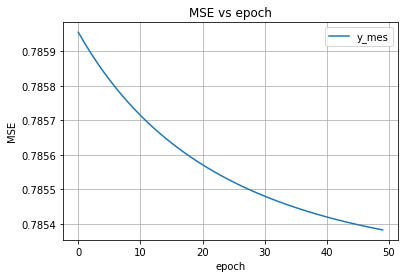

In [37]:
#plot log_loss vs epoch
import matplotlib.pyplot as plt
a=list(range(0,50))
plt.plot(a,mes_y,label='y_mes')
plt.xlabel("epoch")
plt.ylabel("MSE")
plt.title("MSE vs epoch")
plt.legend()
plt.grid()
plt.show()

<br>

<font color='red'> Task 2</font>

In [43]:
data1=pd.read_csv('user_info.csv.txt')
data1.head()

,user_id,age,is_male,orig_user_id
0,0,24,1,1
1,1,53,0,2
2,2,23,1,3
3,3,24,1,4
4,4,33,0,5


##Training model logistic regression
As we know U is the learned matrix of user vectors, with its i-th row  as the vector ui for user i. Each row of U can be seen as a "feature vector" for a particular user.

The question we'd like to investigate is this: do our computed per-user features that are optimized for predicting movie ratings contain anything to do with gender?

The provided data file user_info.csv contains an is_male column indicating which users in the dataset are male. Can you predict this signal given the features U?

In [0]:
from sklearn import linear_model

In [0]:
Y=data1['is_male']
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
 early_stopping=False, epsilon=0.1, eta0=0.0001,
 fit_intercept=True, l1_ratio=0.15, learning_rate='constant',
 loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
 penalty='l2', power_t=0.5, random_state=15, shuffle=True,
 tol=0.001, validation_fraction=0.1, verbose=2, warm_start=False)

In [46]:
clf = linear_model.SGDClassifier(alpha=0.0001,eta0=0.0001,max_iter=1000,loss='log',penalty='l2')
clf.fit(U,Y)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0001,
              fit_intercept=True, l1_ratio=0.15, learning_rate='optimal',
              loss='log', max_iter=1000, n_iter_no_change=5, n_jobs=None,
              penalty='l2', power_t=0.5, random_state=None, shuffle=True,
              tol=0.001, validation_fraction=0.1, verbose=0, warm_start=False)

In [0]:

user_male_pred = clf.predict(U)

##confusion_matrix

In [55]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
def plot_confusion_matrix(test_y, predict_y):
 C = confusion_matrix(test_y, predict_y)

 A =(((C.T)/(C.sum(axis=1))).T)

 B =(C/C.sum(axis=0))
 plt.figure(figsize=(20,4))

 labels = [0,1]
 # representing A in heatmap format
 cmap=sns.light_palette("blue")
 plt.subplot(1, 3, 1)
 sns.heatmap(C, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Confusion matrix")

 plt.subplot(1, 3, 2)
 sns.heatmap(B, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Precision matrix")

 plt.subplot(1, 3, 3)
 # representing B in heatmap format
 sns.heatmap(A, annot=True, cmap=cmap, fmt=".3f", xticklabels=labels, yticklabels=labels)
 plt.xlabel('Predicted Class')
 plt.ylabel('Original Class')
 plt.title("Recall matrix")

 plt.show()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Train confusion_matrix


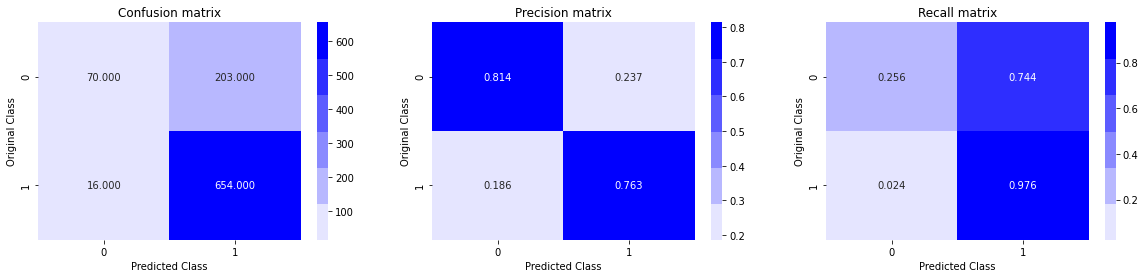

In [56]:
print('Train confusion_matrix')
plot_confusion_matrix(Y,user_male_pred)